In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 2s complement to decimal conversion
def toDecimal(x, bits):
    assert len(x) <= bits, "Input length exceeds bit size"
    n = int(x, 2)
    s = 1 << (bits - 1)
    return (n & s - 1) - (n & s)

tap = 8
N1 = 8
N2 = 16
N3 = 32

real_coeff = 1/tap

In [19]:

coeff_bit = np.binary_repr(int(real_coeff*(2**(N1-1))), N1)
print(coeff_bit)

00010000


In [21]:
t = np.linspace(0, 2*np.pi, 1000)

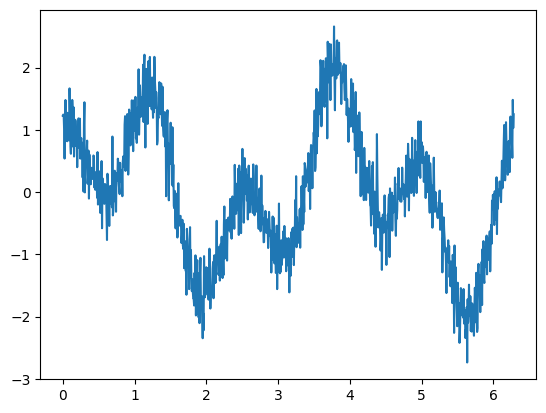

In [22]:
output = np.sin(2*t) + np.cos(5*t) +0.3*np.random.randn(len(t))   # Scale to fit in N1 bits
plt.plot(t, output)
plt.show()

In [27]:
sinlist = []
for val in output:
    sinlist.append(np.binary_repr(int(val*(2**(N1-1))), N2))

with open('../data/input.data', 'w') as f:
    for val in sinlist:
        f.write(val + '\n')


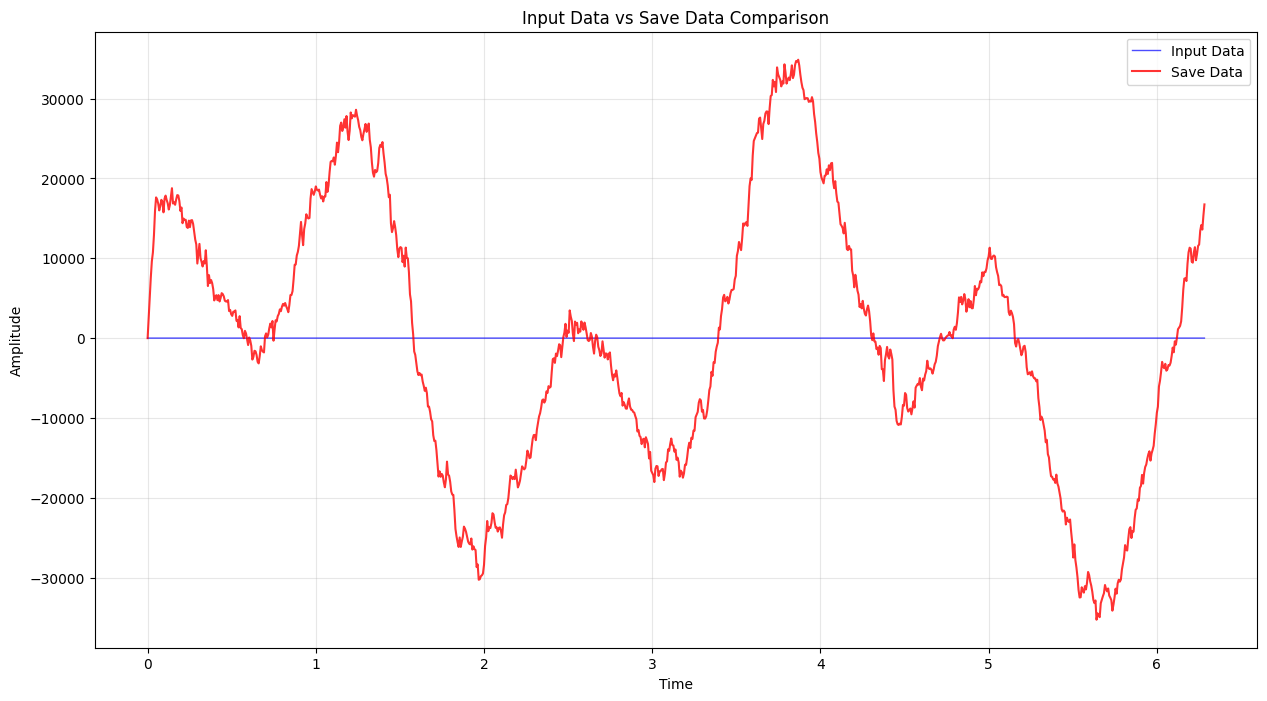

Input data range: -2.736 to 2.662
Save data range: -35280 to 34880
Save data length: 1000
Input data length: 1000


In [30]:
# Read and plot save.data superimposed with input data
def binary_to_signed(binary_str, bits=32):
    """Convert binary string to signed integer using two's complement"""
    n = int(binary_str, 2)
    s = 1 << (bits - 1)
    return (n & s - 1) - (n & s)

# Read the save.data file
save_data = []
with open('../data/save.data', 'r') as f:
    for line in f:
        binary_str = line.strip()
        if binary_str:  # Skip empty lines
            signed_value = binary_to_signed(binary_str)
            save_data.append(signed_value)

save_data = np.array(save_data)

# Plot both datasets superimposed
plt.figure(figsize=(15, 8))
plt.plot(t[:len(save_data)], output[:len(save_data)], 'b-', label='Input Data', alpha=0.7, linewidth=1)
plt.plot(t[:len(save_data)], save_data, 'r-', label='Save Data', alpha=0.8, linewidth=1.5)
plt.title('Input Data vs Save Data Comparison')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Input data range: {output.min():.3f} to {output.max():.3f}")
print(f"Save data range: {save_data.min()} to {save_data.max()}")
print(f"Save data length: {len(save_data)}")
print(f"Input data length: {len(output)}")

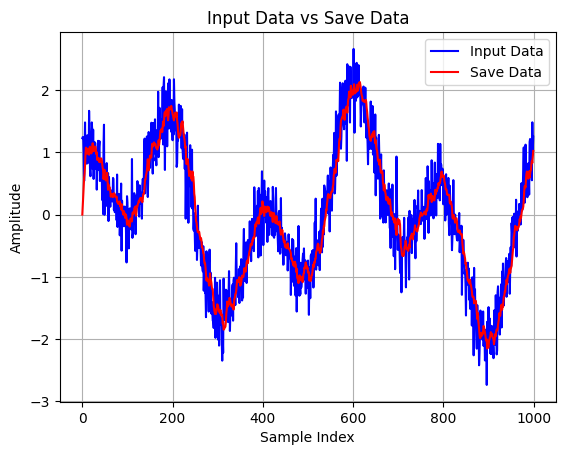

In [ ]:
#TODO: SV code, extract save.data, plot input data vs save data

read_b = []

with open('../data/save.data', 'r') as f:
    for line in f:
        read_b.append(line.strip('\n'))

n_l = []
for by in read_b:
    n_l.append(toDecimal(by, N3)/ (2**(2*(N1-1))))

plt.plot(output, color='blue', label='Input Data')
plt.plot(n_l, color='red', label='Save Data')
plt.title('Input Data vs Save Data')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()